In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [10]:
def random_walk(s, mu, sigma):
    """
    s: a numpy array of dimension (1, num_arms)
    mu: mean of a normal distribution of random walk
    sigma: standard deviation of a normal distribution of random walk
    """
    return s+np.random.normal(loc=mu, scale=sigma, size=s.shape[0])

In [27]:
def eps_greedy(epsilon, Q):
    """
    epsilon: the probability of selection exploration action
    Q: current estimates of the action value function of k armed bandit
    """
    best_action = np.argmax(Q)
    random_draw = np.random.uniform(0,1)
    if random_draw<=1-epsilon:
        return best_action
    else:
        return np.random.choice(list(range(Q.shape[0])))

In [113]:
def multi_task(max_steps,num_samples,epsilon,arm_number,alpha):
    
    data = np.random.normal(loc=np.arange(arm_number) , scale=0.01, size=(num_samples, arm_number))
    
    constQ=np.zeros(arm_number)
    constR=np.zeros(max_steps)
    
    variaQ=np.zeros(arm_number)
    variaN=np.zeros(arm_number)
    variaR=np.zeros(max_steps)
    
    for i in range(max_steps):
        for j in range(num_samples):
            sample_data = data[j,:]
            data[j,:] = random_walk(data[j,:], mu=0.001, sigma=0.01)
            
            #constant step_size
            action_const = eps_greedy(epsilon=epsilon, Q=constQ)
            reward_const = sample_data[action_const]
            constQ[action_const] = constQ[action_const] + alpha*(reward_const - constQ[action_const])
            
            #variant step_size
            action_variant = eps_greedy(epsilon=epsilon, Q=variaQ)
            reward_variant = sample_data[action_variant]
            variaN[action_variant] += 1
            variaQ[action_variant] = variaQ[action_variant] + (1/variaN[action_variant])*(reward_variant-variaQ[action_variant])
            
        constR[i] = np.mean(constQ)
        variaR[i] = np.mean(variaQ)
    
    plt.xlabel('Steps')
    plt.ylabel('Average Reward')
    plt.plot(variaR,color='r',label='Variant Step Size')
    plt.plot(constR,color='b',label='Constant Step Size')
    plt.legend()
    #plt.xticks(np.arange(0,max_steps+1,100))
    #plt.xticks(np.arange(len(constR)), np.arange(100, len(constR)+1) )
    # plt.grid()
    plt.savefig("exercise_2_4.pdf", format="pdf")
    plt.show()
    plt.close()

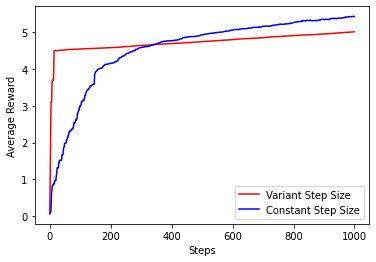

In [114]:
multi_task(max_steps=1000,num_samples=10,epsilon=0.1,arm_number=10,alpha=0.1)